In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
from keras import backend as k

# Don't pre-allocate memory; allocate as-needed
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

In [3]:
# Hyperparameters
batch_size = 128
num_classes = 10
epochs = 300
l = 10
num_filter = 20

In [4]:
# Load CIFAR10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]

# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
# Dense Block
def add_denseblock(input):
    temp = input
    for _ in range(l):
        BatchNorm = BatchNormalization()(temp)
        relu = Activation('relu')(BatchNorm)
        Conv2D_3_3 = Conv2D(num_filter, (3,3), use_bias=False ,padding='same')(relu)
        concat = Concatenate(axis=-1)([temp,Conv2D_3_3])
        temp = concat
        
    return temp

In [6]:
def add_transition(input):
    BatchNorm = BatchNormalization()(input)
    relu = Activation('relu')(BatchNorm)
    Conv2D_BottleNeck = Conv2D(num_filter, (1,1), use_bias=False ,padding='same')(relu)
    avg = AveragePooling2D(pool_size=(2,2))(Conv2D_BottleNeck)
    
    return avg

In [7]:

def output_layer(input):
    BatchNorm = BatchNormalization()(input)
    relu = Activation('relu')(BatchNorm)
    AvgPooling = AveragePooling2D(pool_size=(2,2))(relu)
    flat = Flatten()(AvgPooling)
    output = Dense(num_classes, activation='softmax')(flat)
    
    return output

In [10]:
input = Input(shape=(img_height, img_width, channel,)) 
First_Conv2D = Conv2D(num_filter, (3,3), use_bias=False ,padding='same')(input)

First_Block = add_denseblock(First_Conv2D)
First_Transition = add_transition(First_Block)

Last_Block = add_denseblock(First_Transition)

output = output_layer(Last_Block)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [12]:
input = Input(shape=(img_height, img_width, channel,)) 
First_Conv2D = Conv2D(num_filter, (3,3), use_bias=False ,padding='same')(input)

First_Block = add_denseblock(First_Conv2D) 
First_Transition = add_transition(First_Block)

Second_Block = add_denseblock(First_Transition) 
Second_Transition = add_transition(Second_Block)

Last_Block = add_denseblock(Second_Transition) 
output = output_layer(Last_Block)

In [15]:

input = Input(shape=(img_height, img_width, channel,))
First_Conv2D = Conv2D(num_filter, (3,3), use_bias=False ,padding='same')(input)

First_Block = add_denseblock(First_Conv2D)
First_Transition = add_transition(First_Block)

Second_Block = add_denseblock(First_Transition)
Second_Transition = add_transition(Second_Block)

Third_Block = add_denseblock(Second_Transition)
Third_Transition = add_transition(Third_Block)

Last_Block = add_denseblock(Third_Transition)
output = output_layer(Last_Block)

'''
Epoch 50/50
loss: 0.0695 - acc: 0.9756 - val_loss: 1.1741 - val_acc: 0.7874
'''

'\nEpoch 50/50\nloss: 0.0695 - acc: 0.9756 - val_loss: 1.1741 - val_acc: 0.7874\n'

In [16]:
model = Model(inputs=[input], outputs=[output])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 32, 32, 3)     0                                            
____________________________________________________________________________________________________
conv2d_144 (Conv2D)              (None, 32, 32, 20)    540         input_5[0][0]                    
____________________________________________________________________________________________________
batch_normalization_144 (BatchNo (None, 32, 32, 20)    80          conv2d_144[0][0]                 
____________________________________________________________________________________________________
activation_144 (Activation)      (None, 32, 32, 20)    0           batch_normalization_144[0][0]    
___________________________________________________________________________________________

In [17]:

# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [18]:

model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 219s - loss: 1.3427 - acc: 0.5110 - val_loss: 1.3604 - val_acc: 0.5255
Epoch 2/300
50000/50000 [==============================] - 197s - loss: 0.8604 - acc: 0.6945 - val_loss: 1.1891 - val_acc: 0.6151
Epoch 3/300
50000/50000 [==============================] - 195s - loss: 0.6711 - acc: 0.7656 - val_loss: 0.9309 - val_acc: 0.6823
Epoch 4/300
50000/50000 [==============================] - 198s - loss: 0.5598 - acc: 0.8051 - val_loss: 0.8059 - val_acc: 0.7292
Epoch 5/300
50000/50000 [==============================] - 198s - loss: 0.4766 - acc: 0.8330 - val_loss: 0.9541 - val_acc: 0.7025
Epoch 6/300
50000/50000 [==============================] - 199s - loss: 0.4138 - acc: 0.8555 - val_loss: 0.8070 - val_acc: 0.7359
Epoch 7/300
50000/50000 [==============================] - 199s - loss: 0.3530 - acc: 0.8758 - val_loss: 0.6899 - val_acc: 0.7731
Epoch 8/300
50000/50000 [===============

50000/50000 [==============================] - 132s - loss: 0.0057 - acc: 0.9983 - val_loss: 1.1269 - val_acc: 0.8351
Epoch 126/300
50000/50000 [==============================] - 128s - loss: 0.0143 - acc: 0.9951 - val_loss: 1.3984 - val_acc: 0.8083
Epoch 127/300
50000/50000 [==============================] - 133s - loss: 0.0154 - acc: 0.9949 - val_loss: 1.0802 - val_acc: 0.8394
Epoch 128/300
50000/50000 [==============================] - 136s - loss: 0.0067 - acc: 0.9976 - val_loss: 1.0214 - val_acc: 0.8490
Epoch 129/300
50000/50000 [==============================] - 135s - loss: 0.0049 - acc: 0.9983 - val_loss: 1.1252 - val_acc: 0.8371
Epoch 130/300
50000/50000 [==============================] - 134s - loss: 0.0038 - acc: 0.9990 - val_loss: 1.0611 - val_acc: 0.8477
Epoch 131/300
50000/50000 [==============================] - 134s - loss: 0.0082 - acc: 0.9970 - val_loss: 1.2158 - val_acc: 0.8252
Epoch 132/300
50000/50000 [==============================] - 130s - loss: 0.0146 - acc: 0.

50000/50000 [==============================] - 131s - loss: 6.5585e-05 - acc: 1.0000 - val_loss: 0.9158 - val_acc: 0.8603
Epoch 247/300
50000/50000 [==============================] - 131s - loss: 5.0408e-05 - acc: 1.0000 - val_loss: 0.9204 - val_acc: 0.8607
Epoch 248/300
50000/50000 [==============================] - 129s - loss: 4.9404e-05 - acc: 1.0000 - val_loss: 0.9207 - val_acc: 0.8619
Epoch 249/300
50000/50000 [==============================] - 126s - loss: 4.0187e-05 - acc: 1.0000 - val_loss: 0.9333 - val_acc: 0.8610
Epoch 250/300
50000/50000 [==============================] - 130s - loss: 0.0486 - acc: 0.9852 - val_loss: 0.9511 - val_acc: 0.8396
Epoch 251/300
50000/50000 [==============================] - 130s - loss: 0.0070 - acc: 0.9977 - val_loss: 0.9018 - val_acc: 0.8479
Epoch 252/300
50000/50000 [==============================] - 133s - loss: 0.0012 - acc: 0.9998 - val_loss: 0.8729 - val_acc: 0.8571
Epoch 253/300
50000/50000 [==============================] - 133s - loss: 

In [19]:

# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.948040158832
Test accuracy: 0.8622


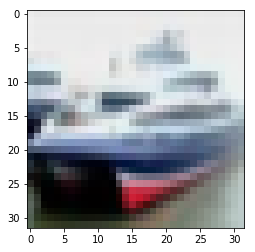

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_test[1])